In [9]:
using JuMP
using GLPK
#using Xpress
using LinearAlgebra,Cbc
using Plots
import Random

# Question 1

A hiker needs to decide which of the 5 items she should pack in her knapsack for a long hike. The utility of the items is 5, 3, 2, 7 and 4 respectively and their weight (in Kg) are 2, 8, 4, 2 and 5. She wants to maximise the utility of items in her knapsack, but she doesn't want to carry more than 10Kg in her knapsack. Which items should she take in her knapsack for the hike? 

Formulate a binary integer program for this problem, indicating decision variables (and their interpretation), objective function (minimised or maximised?) and constraints. Solve it using Julia/JuMP.

Let <br>
    $x_i$'s ($1 \le i \le 5$) be the decision variables where $x_i = 1$ implies the $i^{th}$ item is packed, 0 otherwise <br>
    $u_i$ be the utility of $i^{th}$ item <br>
    $w_i$ be the weight of $i^{th}$ item <br>

Consider the binary ILP

$$ Maximize: \sum_{i = 1}^{5} u_i * x_i $$
$$ Subject\ to: \sum_{i = 1}^{5} w_i * x_i \le 10 $$


In [ ]:
model = Model(GLPK.Optimizer)
utility = [ 5 3 2 7 4 ]
weight  = [ 2 8 4 2 5 ]
max_weight = 10
@variable(model, x[1:5] >= 0, Bin)
@objective(model, Max, sum(utility[i] * x[i] for i in 1:5))
@constraint(model, sum(weight[i] * x[i] for i in 1:5) <= max_weight)
optimize!(model)
print("The hiker brings:\n")
for i in 1:5
    if value(x[i]) > 1e-6
        print("Item ", i, ": weight ", weight[i], " KG, utility ", utility[i], "\n")
    end
end
print("Utility value: ", objective_value(model))

The hiker brings: 
Item 1: weight 2 KG, utility 5
Item 4: weight 2 KG, utility 7
Item 5: weight 5 KG, utility 4
Utility value: 16.0

# Question 2
Let S = {1, 2, 3, 4, 5} and consider the following six subsets of S:
 $$S_1=\{1,2\}$$ $$S_2=\{1,3,5\}$$ $$S_3=\{2,4,5\}$$
 $$S_4=\{3\}$$ $$S_5=\{1\}$$ $$S_6=\{4,5\}$$
 
A cover for S is a group of subsets from among these such that every element of S appears in at least one of the chosen subsets. (E.g., one cover would be $S_1,S_2$ and $S_3$). The problem is to find the cover for S with the fewest number of subsets. (This is an instance of what is known as the set covering problem.)

Formulate a binary integer program for this problem, indicating decision variables (and their interpretation), objective function (minimised or maximised?) and constraints. Solve it using Julia/JuMP.

This is a feasible problem which answers if the minimum number of subsets could cover all items, that is, numbers from 1 to 5.



In [28]:
S = Vector{Vector{Int}}([
    [1, 2],
    [1, 3, 5],
    [2, 4, 5],
    [3],
    [1],
    [4, 5],
])
model = Model(GLPK.Optimizer)
@variable(model, x[1:6, 1:5] >= 0, Bin)
obj = @objective(model, Min, sum(x[i, j] for i in 1:6 for j in 1:5))
constraints = [@constraint(model, sum(x[i, j] for i in 1:6 if j in S[i]) >= 1) for j in 1:5]
optimize!(model)
set_indices = unique([i for i in 1:6 for j in 1:5 if value(x[i, j]) > 1e-6])

println("There are at least ", size(set_indices)[1], " sets to cover 1 to 5")
for i in set_indices
    println("S[", i, "] = ", S[i])
end

There are at least 3 sets to cover 1 to 5
S[1] = [1, 2]
S[2] = [1, 3, 5]
S[3] = [2, 4, 5]


# Question 3

In the 𝑛-queens puzzle 𝑛 chess queens should to be placed in a board with 𝑛 × 𝑛 cells in a way that no queen can attack another, i.e., there must be at most one queen per row, column and diagonal. 

Consider a 8*8 chessboard that need to place 8 queens. Formulate a binary integer program for this problem, indicating decision variables (and their interpretation), objective function (minimised or maximised?) and constraints. Solve it using Julia/JuMP.

<table style="width:20%">
<tr><td height="20"> </td><td bgcolor="pink"> </td><td> </td><td bgcolor="pink"> </td><td> </td><td bgcolor="pink"> </td><td> </td><td bgcolor="pink"> </td></tr>
<tr><td bgcolor="pink" height="20"> </td><td> </td><td bgcolor="pink"> </td><td> </td><td bgcolor="pink"> </td><td> </td><td bgcolor="pink"> </td><td> </td></tr>
<tr><td height="20"> </td><td bgcolor="pink"> </td><td> </td><td bgcolor="pink"> </td><td> </td><td bgcolor="pink"> </td><td> </td><td bgcolor="pink"> </td></tr>
<tr><td bgcolor="pink" height="20"> </td><td> </td><td bgcolor="pink"> </td><td> </td><td bgcolor="pink"> </td><td> </td><td bgcolor="pink"> </td><td> </td></tr>
<tr><td height="20"> </td><td bgcolor="pink"> </td><td> </td><td bgcolor="pink"> </td><td> </td><td bgcolor="pink"> </td><td> </td><td bgcolor="pink"> </td></tr>
<tr><td bgcolor="pink" height="20"> </td><td> </td><td bgcolor="pink"> </td><td> </td><td bgcolor="pink"> </td><td> </td><td bgcolor="pink"> </td><td> </td></tr>
<tr><td height="20"> </td><td bgcolor="pink"> </td><td> </td><td bgcolor="pink"> </td><td> </td><td bgcolor="pink"> </td><td> </td><td bgcolor="pink"> </td></tr>
<tr><td bgcolor="pink" height="20"> </td><td> </td><td bgcolor="pink"> </td><td> </td><td bgcolor="pink"> </td><td> </td><td bgcolor="pink"> </td><td> </td></tr>
</table>

In [ ]:
import Printf
using Printf

model = Model(GLPK.Optimizer)
@variable(model, x[i = 1:8, j = 1:8], Bin)
@objective(model, Max, sum(x[i, j] for i in 1:8 for j in 1:8))

for k in 1:8
    @constraint(model, sum(x[k, j] for j in 1:8) == 1) # only one cell in row
    @constraint(model, sum(x[i, k] for i in 1:8) == 1) # only one cell in col
end

# # Main diagonal constraints
@constraint(model, x[1, 8] <= 1)
@constraint(model, x[1, 7] + x[2, 8] <= 1)
@constraint(model, x[1, 6] + x[2, 7] + x[3, 8] <= 1)
@constraint(model, x[1, 5] + x[2, 6] + x[3, 7] + x[4, 8] <= 1)
@constraint(model, x[1, 4] + x[2, 5] + x[3, 6] + x[4, 7] + x[5, 8] <= 1)
@constraint(model, x[1, 3] + x[2, 4] + x[3, 5] + x[4, 6] + x[5, 7] + x[6, 8] <= 1)
@constraint(model, x[1, 2] + x[2, 3] + x[3, 4] + x[4, 5] + x[5, 6] + x[6, 7] + x[7, 8] <= 1)
@constraint(model, x[1, 1] + x[2, 2] + x[3, 3] + x[4, 4] + x[5, 5] + x[6, 6] + x[7, 7] + x[8, 8] <= 1)
@constraint(model, x[2, 1] + x[3, 2] + x[4, 3] + x[5, 4] + x[6, 5] + x[7, 6] + x[8, 7] <= 1)
@constraint(model, x[3, 1] + x[4, 2] + x[5, 3] + x[6, 4] + x[7, 5] + x[8, 6] <= 1)
@constraint(model, x[4, 1] + x[5, 2] + x[6, 3] + x[7, 4] + x[8, 5] <= 1)
@constraint(model, x[5, 1] + x[6, 2] + x[7, 3] + x[8, 4] <= 1)
@constraint(model, x[6, 1] + x[7, 2] + x[8, 3] <= 1)
@constraint(model, x[7, 1] + x[8, 2] <= 1)
@constraint(model, x[8, 1] <= 1)

# # Sub diagonal constraints
@constraint(model, x[1, 1] <= 1)
@constraint(model, x[2, 1] + x[1, 2] <= 1)
@constraint(model, x[3, 1] + x[2, 2] + x[1, 3] <= 1)
@constraint(model, x[4, 1] + x[3, 2] + x[2, 3] + x[1, 4] <= 1)
@constraint(model, x[5, 1] + x[4, 2] + x[3, 3] + x[2, 4] + x[1, 5] <= 1)
@constraint(model, x[6, 1] + x[5, 2] + x[4, 3] + x[3, 4] + x[2, 5] + x[1, 6] <= 1)
@constraint(model, x[7, 1] + x[6, 2] + x[5, 3] + x[4, 4] + x[3, 5] + x[2, 6] + x[1, 7] <= 1)
@constraint(model, x[8, 1] + x[7, 2] + x[6, 3] + x[5, 4] + x[4, 5] + x[3, 6] + x[2, 7] + x[1, 8] <= 1)
@constraint(model, x[8, 2] + x[7, 3] + x[6, 4] + x[5, 5] + x[4, 6] + x[3, 7] + x[2, 8] <= 1)
@constraint(model, x[8, 3] + x[7, 4] + x[6, 5] + x[5, 6] + x[4, 7] + x[3, 8] <= 1)
@constraint(model, x[8, 4] + x[7, 5] + x[6, 6] + x[5, 7] + x[4, 8] <= 1)
@constraint(model, x[8, 5] + x[7, 6] + x[6, 7] + x[5, 8] <= 1)
@constraint(model, x[8, 6] + x[7, 7] + x[6, 8] <= 1)
@constraint(model, x[8, 7] + x[7, 8] <= 1)
@constraint(model, x[8, 8] <= 1)

optimize!(model)
println(termination_status(model))
for i in 1:8
    for j in 1:8
        @printf("%d   ", value(x[i , j]))
    end
    println()
end

OPTIMAL
0   0   1   0   0   0   0   0   
0   0   0   0   1   0   0   0   
0   1   0   0   0   0   0   0   
0   0   0   0   0   0   0   1   
1   0   0   0   0   0   0   0   
0   0   0   0   0   0   1   0   
0   0   0   1   0   0   0   0   
0   0   0   0   0   1   0   0   


## Question 4
We are given a set $M=\{1, \dots, m\}$ of clients and a set $N=\{ 1, \dots, n\}$ of sites where a facility can be built. We want to decide which on which of the sites we should open the facility such that the total cost of serving all the clients plus the fixed cost of building a facility is minimised. Each client is served by its closest open facility and the cost of serving the client is equal to the Euclidean distance between the client and its serving facility. The cost of building any facility is $f_j = 1\ \  \forall\ \  j$. Obviously, a facility site can't serve a client if it is not open.

Use the locations of the clients and facilities from the below generator tool for this exercise.

Formulate a binary integer program for this problem, indicating decision variables (and their interpretation), objective function (minimised or maximised?) and constraints. Solve it using Julia/JuMP. Plot the clients, open facilities and which client is being served by which facility. An initial plot of clients and facilities is given below.

In [29]:
Random.seed!(314)

# number of clients
m = 12
# number of facility locations
n = 5

# Clients' locations
Xc = rand(m)
Yc = rand(m)

# Facilities' potential locations
Xf = rand(n)
Yf = rand(n)

# Fixed costs
f = ones(n);

# Distance
c = zeros(m, n)
for i in 1:m
    for j in 1:n
        c[i, j] = LinearAlgebra.norm([Xc[i] - Xf[j], Yc[i] - Yf[j]], 2)
    end
end

Display the data

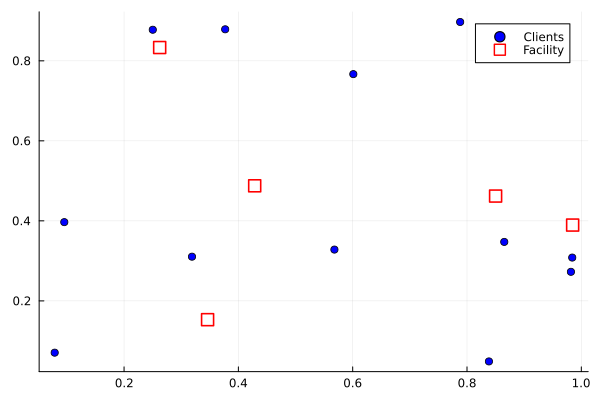

In [30]:
Plots.scatter(
    Xc,
    Yc,
    label = "Clients",
    markershape = :circle,
    markercolor = :blue,
)
Plots.scatter!(
    Xf,
    Yf,
    label = "Facility",
    markershape = :square,
    markercolor = :white,
    markersize = 6,
    markerstrokecolor = :red,
    markerstrokewidth = 2,
)

In [ ]:
# Client - M, Facility - N
model = Model(GLPK.Optimizer)
@variable(model, x[1:m, 1:n] >= 0, Bin)
@objective(model, Min, 
    sum(x[i, j] * c[i, j]
            for i in 1:m 
                for j in 1:n)
)
for i in 1:m
    @constraint(model, sum(x[i, j] for j in 1:n) >= 1)
end
optimize!(model)
println("Cost = ", objective_value(model))
for i in 1:m
    for j in 1:n
        if value(x[i, j]) > 1e-6
            println("Facility ", j, " serves customer ", i, " at distance ", c[i, j])
        end
    end
end

Cost = 2.618412253009799
Facility 1 serves customer 1 at distance 0.12333196366244316
Facility 3 serves customer 2 at distance 0.2118141492442621
Facility 5 serves customer 3 at distance 0.08121323907347186
Facility 2 serves customer 4 at distance 0.4394211453663715
Facility 4 serves customer 5 at distance 0.2799105838498732
Facility 4 serves customer 6 at distance 0.15981301610805157
Facility 2 serves customer 7 at distance 0.11566841491203243
Facility 5 serves customer 8 at distance 0.11683259146638954
Facility 5 serves customer 9 at distance 0.3709356361960957
Facility 3 serves customer 10 at distance 0.3452845835226838
Facility 3 serves customer 11 at distance 0.32817324889696137
Facility 1 serves customer 12 at distance 0.04601368071116289


## Question 5
Consider the Petersen graph below:

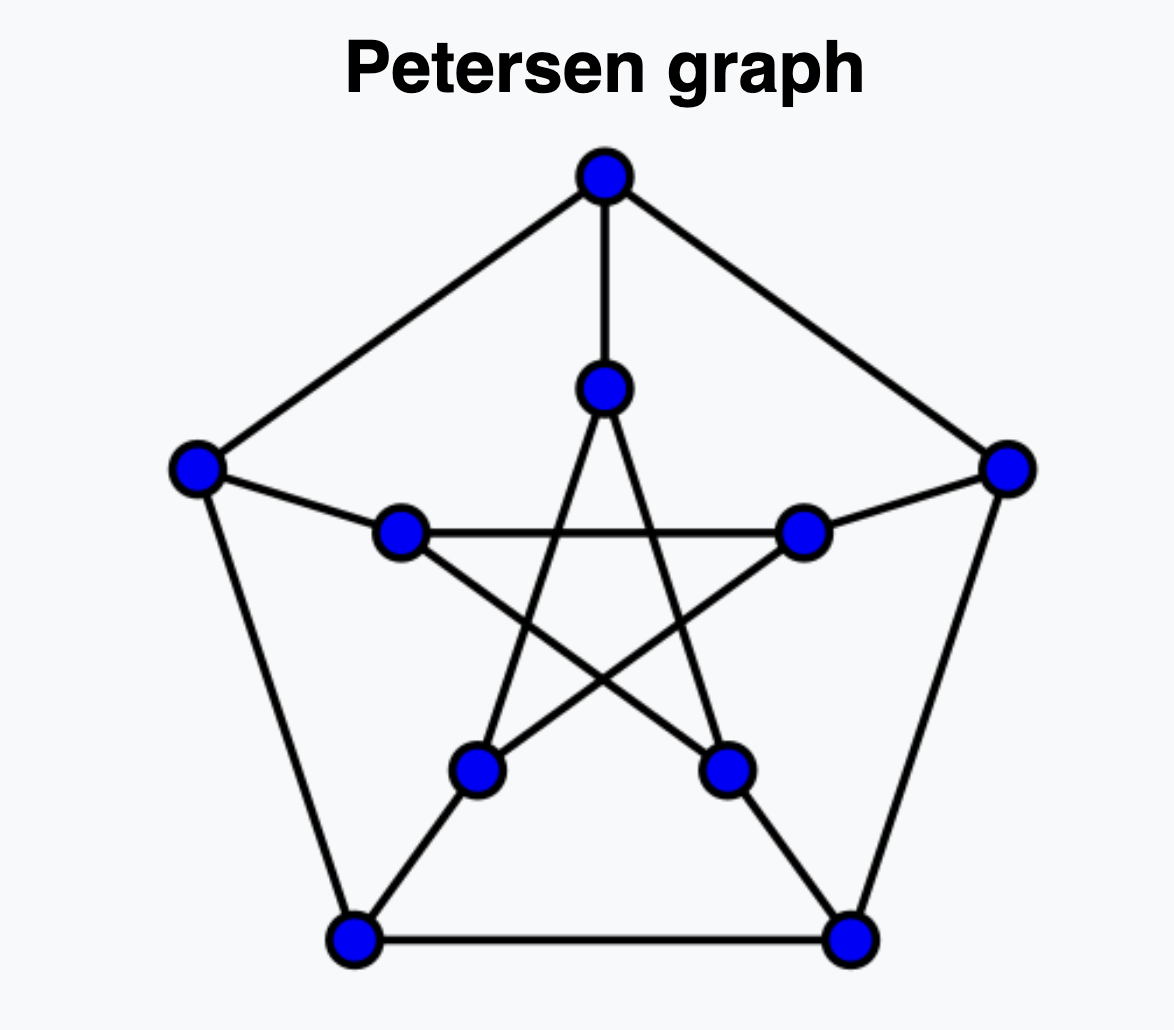

You want to check the hypothesis that this graph can be 3-coloured.Formulate a binary integer program to check the hypothesis, indicating decision variables (and their interpretation), objective function (minimised or maximised?) and constraints. Solve it using Julia/JuMP and answer the hypothesis one way or other.

In [89]:
edges = [
    (1, 2)
    (2, 3)
    (3, 4)
    (4, 5)
    (5, 1)
    (6, 8)
    (8, 10)
    (1, 7)
    (7, 9)
    (9, 6)
    (5, 10)
    (1, 6)
    (2, 7)
    (3, 8)
    (4, 9)
]
E = size(edges)
C = 3
N = 10

model = Model(GLPK.Optimizer)
@variable(model, x[1:N, 1:C] >= 0, Bin)
# no two adjacent vertices has the same color
for (u, v) in edges
    for c in 1:C
        @constraint(model, x[u, c] + x[v, c] <= 1)
    end
end
# all vertices must be colored
for u in 1:N
    @constraint(model, sum(x[u, c] for c in 1:C) == 1)
end
optimize!(model)
if termination_status(model) == OPTIMAL
    println("Yes, we can color the graph using 3 colors")
    for u in 1:N
        println("Vertex ", u, " is colored ", [c for c in 1:C if value(x[u, c]) > 1e-6][1])
    end    
else
    println("3 colors isn't sufficient to color this graph")
end


Yes, we can color the graph using 3 colors
Vertex 1 is colored 1
Vertex 2 is colored 2
Vertex 3 is colored 1
Vertex 4 is colored 3
Vertex 5 is colored 2
Vertex 6 is colored 3
Vertex 7 is colored 3
Vertex 8 is colored 2
Vertex 9 is colored 2
Vertex 10 is colored 1
